# Spotify Genre Analysis

We are going to doing an analysis about the different genres available on Spotify.
The data set has been downloaded from Kaggle.com, we will be trying to analyse what is share of genres, most danceable genre etc.
We will be mainly using common data analysis libraries such as:

- numpy
- pandas
- seasborn
- matplotlib

Also, this project is a part of my final self made assignment for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). The course has helped me immensely and the name is literal, it actually teaches you from zero to pandas.

## Downloading the Dataset

The first step is to find suitable dataset on which analysis could be performed, CSV files are preferred.

> Instructions for downloading the dataset.
>
> - Find an interesting dataset on: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format.
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eshaanagrawal
Your Kaggle Key: ········


 33%|█████████████████████████                                                    | 1.00M/3.06M [00:00<00:00, 5.91MB/s]

100%|█████████████████████████████████████████████████████████████████████████████| 3.06M/3.06M [00:00<00:00, 6.47MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './dataset-of-songs-in-spotify'

In [5]:
import os
os.listdir(data_dir)

['genres_v2.csv', 'playlists.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "spotify-genre-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "eshaana18/spotify-genre-analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/eshaana18/spotify-genre-analysis


'https://jovian.ai/eshaana18/spotify-genre-analysis'

## Data Preparation and Cleaning

We will load the CSV file using pandas and then doing some data cleaning for example excluding non-useful columns.

In [10]:
import numpy as np
import pandas as pd

In [11]:
raw_data = pd.read_csv('./dataset-of-songs-in-spotify/genres_v2.csv');

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
raw_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

So three columns contain null objects namely "song_name", "Unnamed:0", "title".

We won't be needing these three for any analysis done here so it doesnt matter if we have the null values or not.

In [14]:
raw_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [15]:
raw_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

Keeping the columns on which we are going to perform our analysis.

In [16]:
spotify_data = raw_data[['danceability', 
                         'energy', 
                         'speechiness',
                         'acousticness',
                         'instrumentalness', 
                         'liveness','tempo',
                         'duration_ms',
                         'genre',
                         'song_name']
                       ].copy()

In [17]:
spotify_data

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,genre,song_name
0,0.831,0.814,0.4200,0.059800,0.013400,0.0556,156.985,124539,Dark Trap,Mercury: Retrograde
1,0.719,0.493,0.0794,0.401000,0.000000,0.1180,115.080,224427,Dark Trap,Pathology
2,0.850,0.893,0.0623,0.013800,0.000004,0.3720,218.050,98821,Dark Trap,Symbiote
3,0.476,0.781,0.1030,0.023700,0.000000,0.1140,186.948,123661,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,0.2930,0.217000,0.000000,0.1660,147.988,123298,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,0.0304,0.031500,0.000345,0.1210,150.013,269208,hardstyle,NaN
42301,0.517,0.768,0.0479,0.022500,0.000018,0.2050,149.928,210112,hardstyle,NaN
42302,0.361,0.821,0.0505,0.026000,0.000242,0.3850,154.935,234823,hardstyle,NaN
42303,0.477,0.921,0.0392,0.000551,0.029600,0.0575,150.042,323200,hardstyle,NaN


For analysis that will be affected by having the null values in the "song_name" column, we'll we preparing a new data set.

In [18]:
white_df = spotify_data[spotify_data["song_name"].notna()]

In [19]:
white_df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,genre,song_name
0,0.831,0.814,0.4200,0.05980,0.013400,0.0556,156.985,124539,Dark Trap,Mercury: Retrograde
1,0.719,0.493,0.0794,0.40100,0.000000,0.1180,115.080,224427,Dark Trap,Pathology
2,0.850,0.893,0.0623,0.01380,0.000004,0.3720,218.050,98821,Dark Trap,Symbiote
3,0.476,0.781,0.1030,0.02370,0.000000,0.1140,186.948,123661,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,0.2930,0.21700,0.000000,0.1660,147.988,123298,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,0.4670,0.00854,0.000000,0.1310,160.299,209582,Hiphop,Daddy's Girl
21521,0.415,0.548,0.2850,0.22400,0.000000,0.1220,154.272,213898,Hiphop,'94
21522,0.785,0.648,0.2790,0.01570,0.001980,0.1000,184.160,271867,Hiphop,Born 2 Live
21523,0.747,0.832,0.1850,0.23300,0.000014,0.1300,188.760,182040,Hiphop,Can't Hold On


## Exploratory Analysis and Visualization

We will doing some surface analysis for the data by basic graphs and functions.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Let's see what is the division of songs across different genres and plot a pie chart for the same.

In [21]:
genre_count= spotify_data.genre.value_counts()
genre_count

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

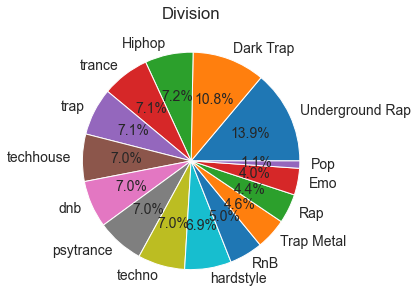

In [22]:
plt.title("Division")
plt.pie(genre_count, labels = genre_count.index, autopct='%1.1f%%');

#### Let's find out what is the most danceable genre.

In [23]:
spotify_data.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [24]:
dance_genre = spotify_data.groupby("genre")[["danceability"]].mean().sort_values("danceability",ascending=False)

In [25]:
dance_genre

,danceability
genre,
techhouse,0.786794
Underground Rap,0.744658
Rap,0.742877
techno,0.715742
Hiphop,0.698982
Pop,0.676807
RnB,0.674206
Trap Metal,0.647564
Dark Trap,0.618834


#### Let's try to find out a relation if exists between tempo and energy across different genres.

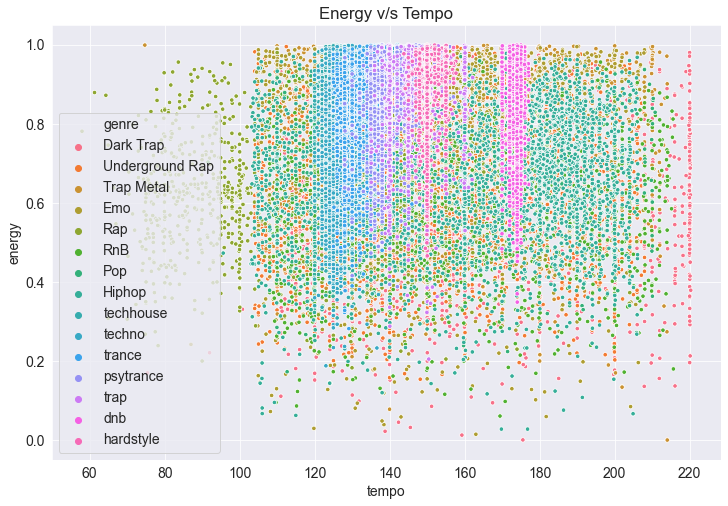

In [26]:
plt.figure(figsize = (12,8))
plt.title ("Energy v/s Tempo")
sns.scatterplot(x='tempo', y='energy', hue='genre', data=spotify_data,s=20);

#### Let's compare different genres on the basis of duration of songs, using a horizontal bar plot.

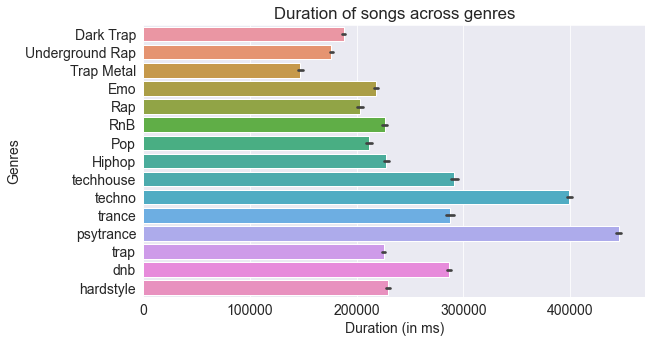

In [27]:
plt.title("Duration of songs across genres")
sns.color_palette("husl",15)
sns.barplot(y='genre', x='duration_ms', data=spotify_data)
plt.xlabel("Duration (in ms)")
plt.ylabel("Genres");

## Asking and Answering Questions

After getting an initial knowledge about the data let's dive deeper and answer some questions about the data.

#### Q1: What is the mean duration in minutes of song from every genre?

In [28]:
mean_duration = spotify_data.groupby("genre")[["duration_ms"]].mean().sort_values("duration_ms",ascending = False)

In [29]:
mean_duration["duration(in minutes)"] = mean_duration["duration_ms"]/(1000*60)

In [30]:
mean_duration

,duration_ms,duration(in minutes)
genre,,
psytrance,445575.322864,7.426255
techno,399263.969553,6.654399
techhouse,291691.778151,4.861530
trance,287512.124708,4.791869
dnb,286548.825017,4.775814
hardstyle,229493.391349,3.824890
Hiphop,227954.272787,3.799238
RnB,226402.473559,3.773375
trap,225174.448945,3.752907


#### Q2: Which contains more words Hiphop or Rap?

Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.


(from Spotify's developer blog: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

In [31]:
speech_test = spotify_data[["genre","speechiness"]]

In [32]:
speech_test

,genre,speechiness
0,Dark Trap,0.4200
1,Dark Trap,0.0794
2,Dark Trap,0.0623
3,Dark Trap,0.1030
4,Dark Trap,0.2930
...,...,...
42300,hardstyle,0.0304
42301,hardstyle,0.0479
42302,hardstyle,0.0505
42303,hardstyle,0.0392


In [33]:
Rap_speech_test = speech_test.groupby("genre").get_group("Rap")
Hiphop_speech_test = speech_test.groupby("genre").get_group("Hiphop")

In [34]:
Rap_speech_test

,genre,speechiness
14089,Rap,0.0807
14090,Rap,0.2760
14091,Rap,0.2220
14092,Rap,0.0317
14093,Rap,0.0500
...,...,...
15932,Rap,0.0652
15933,Rap,0.0302
15934,Rap,0.3110
15935,Rap,0.2020


In [35]:
Hiphop_speech_test

,genre,speechiness
18497,Hiphop,0.3490
18498,Hiphop,0.2690
18499,Hiphop,0.0545
18500,Hiphop,0.3320
18501,Hiphop,0.0464
...,...,...
21520,Hiphop,0.4670
21521,Hiphop,0.2850
21522,Hiphop,0.2790
21523,Hiphop,0.1850


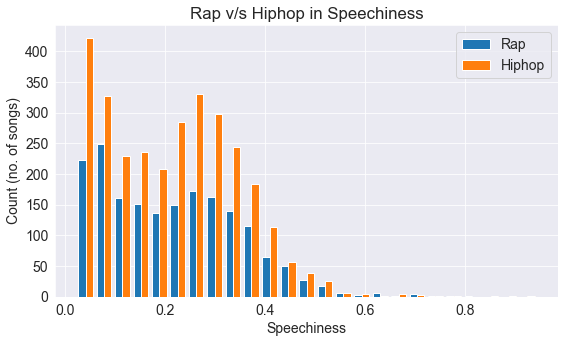

In [36]:
plt.hist([Rap_speech_test.speechiness,Hiphop_speech_test.speechiness], bins=25,label=['Rap','Hiphop'])
plt.legend()
plt.xlabel('Speechiness')
plt.ylabel('Count (no. of songs)')
plt.title('Rap v/s Hiphop in Speechiness');

From the above graph it is clear that Hiphop contains more words.

#### Q3: What type of music is considered safe while driving?
###### The safest BPM/Tempo lies in the range of 60 to 80, according to this Huffpost article: https://www.huffpost.com/entry/safest-driving-music-coldplay-study_n_2488652# 

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

(from Spotify's developer blog: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

In [37]:
safe_songs = spotify_data[(59 < spotify_data.tempo) & (spotify_data.tempo < 81)]

In [38]:
safe_songs

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,genre,song_name
430,0.450,0.170,0.0475,0.9660,0.138000,0.0440,75.418,66717,Dark Trap,It Kept People Away
10630,0.314,0.999,0.3090,0.4920,0.004800,0.8810,74.716,106120,Trap Metal,THIS IS THE PART WHERE YOU RUN (YOU'RE FUCKED)
12116,0.314,0.999,0.3090,0.4920,0.004800,0.8810,74.716,106120,Trap Metal,THIS IS THE PART WHERE YOU RUN (YOU'RE FUCKED)
14089,0.745,0.561,0.0807,0.0758,0.000000,0.1330,77.557,248431,Rap,Empty
14092,0.598,0.427,0.0317,0.0546,0.000006,0.2100,76.469,175721,Rap,HIGHEST IN THE ROOM
...,...,...,...,...,...,...,...,...,...,...
15910,0.573,0.831,0.4330,0.0401,0.000000,0.0909,76.352,277707,Rap,Ether
15914,0.762,0.437,0.3110,0.4520,0.000000,0.0972,80.446,178993,Rap,At the Pot
15921,0.712,0.759,0.3340,0.0160,0.080800,0.2170,79.103,249333,Rap,Yonkers
15922,0.519,0.664,0.2770,0.0785,0.000000,0.1460,73.019,248359,Rap,Lucky Me


In [39]:
safe_songs.groupby("genre")[["tempo"]].mean()

,tempo
genre,
Dark Trap,75.418000
Rap,76.397674
Trap Metal,74.716000


##### "Dark Trap, Rap & Trap Metal" come out as the safest genres to listen to while driving.

#### Q4: What if we would have excluded the entries having song name as NaN?
#### How could this have affected our results?

We have two cleaned data sets one with some NaN values in the "song_name" column *spotify_data* and another one not having any values in the "song_name" column *white_df*. 

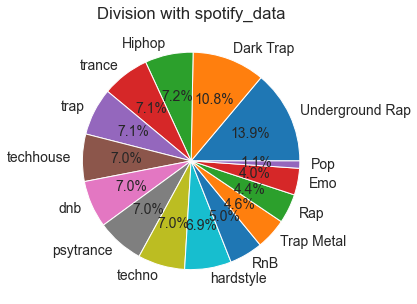

In [40]:
genre_count_1= spotify_data.genre.value_counts()
plt.title("Division with spotify_data")
plt.pie(genre_count_1, labels = genre_count_1.index, autopct='%1.1f%%');

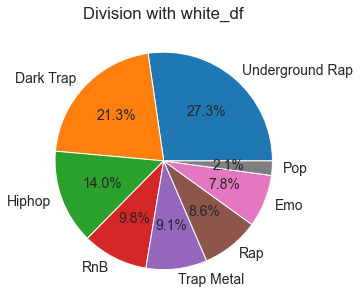

In [41]:
genre_count_2= white_df.genre.value_counts()
plt.title("Division with white_df")
plt.pie(genre_count_2, labels = genre_count_2.index, autopct='%1.1f%%');

From visual comparison, it is evident that we would have 'cleaned' a lot of genres out of the data.

## Inferences and Conclusion

- An average song is 3-4 minutes long
- The genre techhouse is the most danceable genre.
- The genre psytrance has the longest songs.
- An average hiphop song will contain more words than a rap song.
- The safest genres to listen to while driving are: Dark Trap, Rap & Trap Metal.

### Most important inference: If the data contains some entries with null values, but the null values reside in a column which would not be used for analysis it would be better to keep the entries with null data.

## Future Scope

We could do a comparitive study for each analysis we have done here while using NaN entries and non-NaN entries.
Also, we could build a basic recommendation engine out of the data.

Documentation of different libraries have helped me a lot during this project.

Stackflow has also been a helper in understanding the error codes displayed and how to resolve them.

In [42]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
